In [1]:
from typing import List, TypedDict
from langgraph.graph import StateGraph,START,END

In [2]:
class AgentState(TypedDict):
    num1 : int
    num2 : int
    operation : str
    finalNumber : int


In [3]:
def adder(state: AgentState) -> AgentState:
    state["finalNumber"] = state["num1"] + state["num2"]
    return state
def subtractor(state: AgentState) -> AgentState:
    state["finalNumber"] = state["num1"] - state["num2"]
    return state
def decider(state: AgentState) -> AgentState:
    if state["operation"] == "+":
        return "adder"
    elif state["operation"] == "-":
        return "subtractor"
    else:
        raise ValueError("Invalid operation")

In [5]:
graph = StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("router", lambda state: state)
graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router", 
    decider,
    {
        "adder": "adder",
        "subtractor": "subtractor"
    }
    )
graph.add_node("adder2", adder)
graph.add_node("subtractor2", subtractor)
graph.add_node("router2", lambda state: state)
graph.add_edge("adder", "router2")
graph.add_edge("subtractor", "router2")
graph.add_conditional_edges(
    "router2", 
    decider,
    {
        "adder": "adder2",
        "subtractor": "subtractor2"
    }
    )
graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)
app = graph.compile()

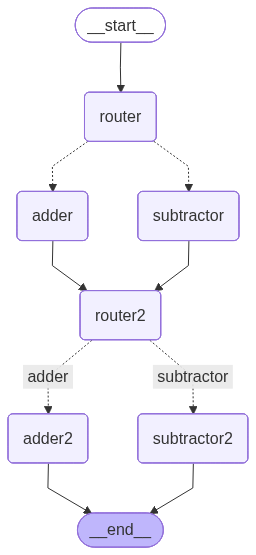

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
app.invoke({"num1": 10, "num2": 5, "operation": "-"})

{'num1': 10, 'num2': 5, 'operation': '-', 'finalNumber': 5}